In [61]:
import numpy as np 
import pandas as pd 
from scipy import stats
import os
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math

In [5]:
employee = pd.read_csv('preprocessed.csv')

In [6]:
employee.head()

,Age,EducationBackground,MaritalStatus,EmpDepartment,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Male,0
0,32,2,0,1,1,10,3,4,55,3,...,2,2,10,7,0,8,0,3,1,13
1,47,2,0,1,1,14,4,4,42,3,...,2,3,7,7,1,7,0,3,1,13
2,40,0,1,1,2,5,4,4,48,2,...,2,3,18,13,1,12,0,4,1,13
3,41,4,2,4,1,10,4,2,73,2,...,2,2,21,6,12,6,0,3,1,8
4,60,2,0,1,1,16,4,1,84,3,...,1,3,2,2,2,2,0,3,1,13


In [7]:
employee.columns=[  'Age',          'EducationBackground',
                      'MaritalStatus',                'EmpDepartment',
            'BusinessTravelFrequency',             'DistanceFromHome',
                  'EmpEducationLevel',   'EmpEnvironmentSatisfaction',
                      'EmpHourlyRate',            'EmpJobInvolvement',
                        'EmpJobLevel',           'EmpJobSatisfaction',
                 'NumCompaniesWorked',                     'OverTime',
           'EmpLastSalaryHikePercent',  'EmpRelationshipSatisfaction',
         'TotalWorkExperienceInYears',        'TrainingTimesLastYear',
                 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole',      'YearsSinceLastPromotion',
               'YearsWithCurrManager',                    'Attrition',
                  'PerformanceRating',                         'Gender',
                         'EmpJobRole'           ]

In [9]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
Age                             1200 non-null int64
EducationBackground             1200 non-null int64
MaritalStatus                   1200 non-null int64
EmpDepartment                   1200 non-null int64
BusinessTravelFrequency         1200 non-null int64
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null int64
EmpLastSalaryHikePercent        1200 non-null int64
EmpRelationshipSatisfaction     1200 non-null int64
TotalWorkExperienceInYears      1200 non-null int64
TrainingT

In [10]:
employee.corr()

,Age,EducationBackground,MaritalStatus,EmpDepartment,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,Gender,EmpJobRole
Age,1.000000,-0.056418,0.098368,0.042295,-0.011196,0.020937,0.207313,0.013814,0.062867,0.027216,...,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164,-0.040107,-0.037665
EducationBackground,-0.056418,1.000000,0.024677,0.012214,0.014823,0.001153,0.038776,0.055765,-0.052478,-0.030867,...,-0.001525,0.033959,-0.017997,-0.001882,-0.021812,0.004460,0.057345,0.018644,0.022507,0.030515
MaritalStatus,0.098368,0.024677,1.000000,0.077138,-0.026075,0.019148,-0.026737,0.032467,0.013540,0.043355,...,-0.026045,-0.014154,0.075728,0.076663,0.052951,0.061908,-0.162969,-0.024172,0.042169,-0.038023
EmpDepartment,0.042295,0.012214,0.077138,1.000000,0.016189,0.035802,0.006735,0.047219,0.013530,0.042514,...,-0.011192,-0.030791,-0.026455,-0.049500,-0.042872,-0.021713,-0.077275,0.005205,0.024570,-0.442338
BusinessTravelFrequency,-0.011196,0.014823,-0.026075,0.016189,1.000000,-0.044148,-0.016810,-0.013393,-0.002481,0.061692,...,0.023643,0.006703,-0.000242,-0.029698,-0.010331,-0.006761,0.129229,0.004928,-0.042369,-0.048414
DistanceFromHome,0.020937,0.001153,0.019148,0.035802,-0.044148,1.000000,0.045856,-0.017719,0.013730,0.003231,...,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142,-0.001507,0.022939
EmpEducationLevel,0.207313,0.038776,-0.026737,0.006735,-0.016810,0.045856,1.000000,-0.037103,0.014095,0.027544,...,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529,-0.022960,-0.016792
EmpEnvironmentSatisfaction,0.013814,0.055765,0.032467,0.047219,-0.013393,-0.017719,-0.037103,1.000000,-0.049501,0.004865,...,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561,0.000033,0.044612
EmpHourlyRate,0.062867,-0.052478,0.013540,0.013530,-0.002481,0.013730,0.014095,-0.049501,1.000000,0.054741,...,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.026313,-0.043116,0.002218,-0.016179
EmpJobInvolvement,0.027216,-0.030867,0.043355,0.042514,0.061692,0.003231,0.027544,0.004865,0.054741,1.000000,...,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.153360,-0.010539,0.010949,-0.008034


In [13]:
X = employee.loc[:,['Age', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Gender',
       'EmpJobRole']]

In [20]:
y = employee.loc[:,['PerformanceRating']]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

/home/ppuranik/softwares/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ppuranik/softwares/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ppuranik/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [67]:
test = PCA()
t = test.fit_transform(X)
test.explained_variance_ratio_

array([5.46484211e-01, 1.89906744e-01, 8.92774593e-02, 6.50778688e-02,
       3.05698074e-02, 1.99220812e-02, 1.75183327e-02, 8.14394632e-03,
       7.29667326e-03, 5.40251328e-03, 4.57599266e-03, 2.52934108e-03,
       2.13384796e-03, 1.66353171e-03, 1.58724195e-03, 1.53222970e-03,
       1.34994570e-03, 1.33402068e-03, 7.16705717e-04, 6.59906709e-04,
       6.44717177e-04, 5.70671857e-04, 3.92697756e-04, 3.12702072e-04,
       2.77335935e-04, 1.19473764e-04])

In [82]:
X.columns

Index(['Age', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Gender', 'EmpJobRole'],
      dtype='object')

In [81]:
test.explained_variance_ratio_[0:11].sum()

0.98417563023397

In [43]:
model_pca = PCA(n_components=15)
pca_c = model_pca.fit_transform(X)

In [44]:
pca_var = pd.DataFrame(model_pca.explained_variance_ratio_)

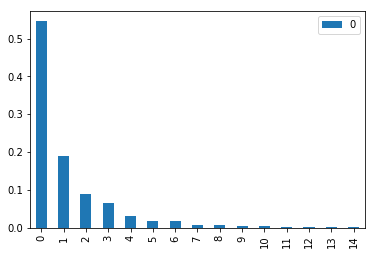

In [45]:
pca_var.plot(kind = 'bar')

## Features that are influencing the performace

In [46]:
from sklearn.ensemble import RandomForestRegressor
names = X.columns

In [52]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
print ("Features sorted by their score:")

Features sorted by their score:


/home/ppuranik/softwares/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ppuranik/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [53]:
vals = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),names), 
             reverse=True)

In [62]:
for i in vals:
    percentage = str(math.ceil(i[0]*100)) + " %"
    print(percentage, i[1])

24 % EmpLastSalaryHikePercent
24 % EmpEnvironmentSatisfaction
21 % YearsSinceLastPromotion
8 % EmpJobRole
6 % ExperienceYearsInCurrentRole
4 % EmpWorkLifeBalance
3 % Age
2 % YearsWithCurrManager
2 % EmpHourlyRate
2 % EmpEducationLevel
1 % TrainingTimesLastYear
1 % ExperienceYearsAtThisCompany
1 % EducationBackground
1 % EmpJobLevel
1 % MaritalStatus
1 % NumCompaniesWorked
1 % DistanceFromHome
1 % EmpRelationshipSatisfaction
1 % TotalWorkExperienceInYears
1 % EmpDepartment
1 % EmpJobSatisfaction
1 % EmpJobInvolvement
1 % BusinessTravelFrequency
1 % Gender
1 % Attrition
1 % OverTime
